In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

use pandas to read in the csv file and check if it is properly formatted

In [79]:
df = pd.read_csv("USMNT_data.csv")
df.head()

,league,country_play_in,team,player_age,player_market_val,player_name,player_position,profile_link
0,EPL,UK,Arsenal,28,5500000,Matt Turner,Goalkeeper,https://www.transfermarkt.com/matt-turner/prof...
1,MLS,US,NYFC,33,1650000,Sean Johnson,Goalkeeper,https://www.transfermarkt.com/sean-johnson/pro...
2,Championship,UK,Luton Town,27,880000,Ethan Horvath,Goalkeeper,https://www.transfermarkt.com/ethan-horvath/pr...
3,Scottish Premiership,Scotland,Celtic,24,7700000,Cameron Carter-Vickers,Centre-Back,https://www.transfermarkt.com/cameron-carter-v...
4,MLS,US,Nashville FC,29,3850000,Walker Zimmerman,Centre-Back,https://www.transfermarkt.com/walker-zimmerman...


see how many data entries and columns there are

In [80]:
df.shape

(59, 8)

showing basic summary stats for the data 

In [81]:
df.describe().round()

,player_age,player_market_val
count,59.0,59.0
mean,24.0,7173305.0
std,4.0,8877120.0
min,18.0,220000.0
25%,21.0,2200000.0
50%,23.0,3850000.0
75%,26.0,7975000.0
max,34.0,46200000.0


change the data type of to int as it was read in as a str

In [84]:
df = df.astype({'player_market_val':'int'})

check to make sure the data type went through

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   league             59 non-null     object
 1   country_play_in    59 non-null     object
 2   team               59 non-null     object
 3   player_age         59 non-null     int64 
 4   player_market_val  59 non-null     int64 
 5   player_name        59 non-null     object
 6   player_position    59 non-null     object
 7   profile_link       59 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.8+ KB


use isna().sum() to make sure there is no missing data, in this case there isn't any so we don't need to fix anything

In [83]:
df.isna().sum()

league               0
country_play_in      0
team                 0
player_age           0
player_market_val    0
player_name          0
player_position      0
profile_link         0
dtype: int64

counting the number of players in each league

In [85]:
df.league.value_counts()

MLS                       19
EPL                        7
Bundesliga                 6
Championship               5
Belgian Pro League         3
La Liga                    3
Scottish Premiership       3
Ligue 1                    2
Eredivise                  2
2 Bundesliga               1
Portugese Primera          1
Serie A                    1
Super Lig                  1
Serie B                    1
Super League Greece        1
Championnat National 2     1
Segunda Division           1
Brasileiro Serie A         1
Name: league, dtype: int64

using the counts to display the top 4 leagues USMNT players are in

Text(0.5, 1.0, 'Top 4 leagues based off count of USMNT players')

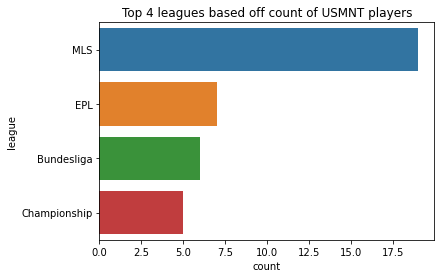

In [86]:
sns.countplot(y='league',order = df['league'] .value_counts().index[0:4],data = df)
plt.title("Top 4 leagues based off count of USMNT players")

counting the number of players playing in each country

In [87]:
df.country_play_in.value_counts()

US             19
UK             12
Germany         7
Spain           4
Scotland        3
France          3
Belgium         3
Italy           2
Netherlands     2
Portugal        1
Turkey          1
Greece          1
Brazil          1
Name: country_play_in, dtype: int64

using the counts to display the top 4 countries players play in

Text(0.5, 1.0, 'Top 4 countries based off count of USMNT players')

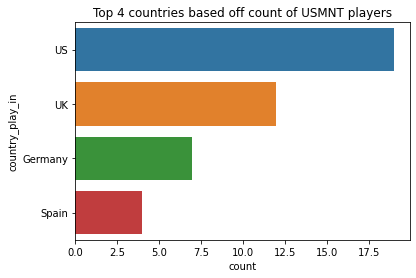

In [88]:
sns.countplot(y="country_play_in",order = df['country_play_in'].value_counts().index[0:4],data =df)
plt.title("Top 4 countries based off count of USMNT players")

find the mean of the players age and then their market value

In [96]:
df[["player_age","player_market_val"]].mean().round(1)


player_age                23.0
player_market_val    3850000.0
dtype: float64

display a table that groups the players to their leagues and sorts by the average value per player

In [91]:
df.groupby("league")[["player_market_val"]].mean().round().sort_values(["player_market_val"], ascending = False)

,player_market_val
league,
Serie A,27500000.0
EPL,16500000.0
Bundesliga,12650000.0
La Liga,12411667.0
Serie B,9350000.0
Ligue 1,8250000.0
Super League Greece,6600000.0
Portugese Primera,4400000.0
Scottish Premiership,4216667.0


displaying the top 5 leagues from the previous table

In [92]:
df.groupby("league")[["player_market_val"]].mean().round().sort_values(["player_market_val"], ascending = False).head(5)

,player_market_val
league,
Serie A,27500000.0
EPL,16500000.0
Bundesliga,12650000.0
La Liga,12411667.0
Serie B,9350000.0


table sorts the players whos value is over 10 million and then displays them in a table in descending order

In [99]:
df_1 = df["player_market_val"] > 10000000
df2 = df[df_1]
df2.sort_values(["player_market_val"],ascending = False).head(10)

,league,country_play_in,team,player_age,player_market_val,player_name,player_position,profile_link
21,EPL,UK,Chelsea,23,46200000,Christian Pulisic,Right Winger,https://www.transfermarkt.com/christian-pulisi...
26,Bundesliga,Germany,Borussia Dortmund,19,38500000,Giovanni Reyna,Right Winger,https://www.transfermarkt.us/giovanni-reyna/pr...
14,Serie A,Italy,Juventus,23,27500000,Weston McKennie,Central Midfield,https://www.transfermarkt.com/weston-mckennie/...
18,EPL,UK,Leeds United,21,27500000,Brenden Aaronson,Attacking Midfield,https://www.transfermarkt.com/brenden-aaronson...
27,La Liga,Spain,Barcelona,21,19800000,Sergino Dest,Right-Back,https://www.transfermarkt.us/sergino-dest/prof...
12,EPL,UK,Leeds United,23,18700000,Tyler Adams,Defensive Midfield,https://www.transfermarkt.com/tyler-adams/prof...
15,La Liga,Spain,Valencia,19,16500000,Yunus Musah,Central Midfield,https://www.transfermarkt.com/yunus-musah/prof...
23,Ligue 1,France,Lille,22,13200000,Timothy Weah,Centre-Forward,https://www.transfermarkt.com/timothy-weah/pro...


this takes the table above and puts it into a scatterplot 

Text(0.5, 1.0, "USMNT player's valued over 10 million")

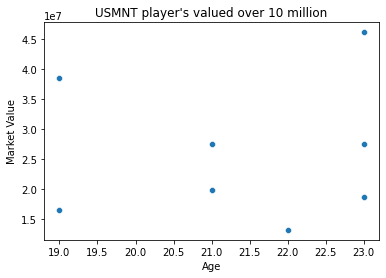

In [105]:
sns.scatterplot(data = df2,x = "player_age",y = "player_market_val")
plt.xlabel("Age")
plt.ylabel("Market Value")
plt.title("USMNT player's valued over 10 million")

Finding the top leagues players valued over 10 million play in

Text(0.5, 1.0, 'Count of USMNT players valued over 10 million in each league')

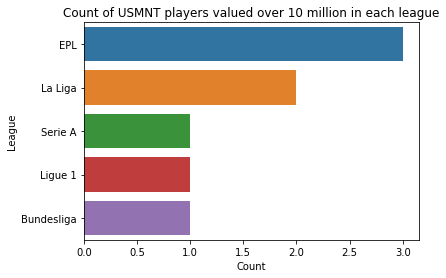

In [118]:
sns.countplot(y='league',order = df2['league'] .value_counts().index[0:],data = df2)
plt.xlabel("Count")
plt.ylabel("League")
plt.title("Count of USMNT players valued over 10 million in each league")